<a href="https://colab.research.google.com/github/gersonviav/cnn_clasification_shoes_sandal_boots/blob/main/CNN_MAESTRIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[Apartado para el enunciado e introducción]]

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=dbb5704181b3a78fffb287ec4d4b3d1f6b2580182c2e818415d6097065cc4bdc
  Stored in directory: /root/.cache/pip/wheels/9f/af/22/bf406f913dc7506a485e60dce8143741abd0a92a19337d83a3
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17


In [ ]:
print("Hola mundo")

In [ ]:
print('diana')

diana


In [ ]:
from google.colab import files
files.upload()  # Esto abrirá una ventana para seleccionar el archivo kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gervivu","key":"80a4452c43cf4c34a775e3058569e8eb"}'}

In [ ]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Ya podemos listar los datasets disponibles en kaggle para su descarga
!kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          12695        261  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset                    22KB  2024-10-06 11:27:38           6647        108  1.0              
octopusteam/imdb-top-1000-tv-series                          IMDb Top 1000 TV Series                         23KB  2024-10-25 08:00:06           1179         26  1.0              
satvshr/top-4-used-car-sales-datasets-combined               Top 4 Used Car Sales Datasets Combined 

#de aqui comienza

# 1.0 Inicialización

##1.1 Leer los datos

In [ ]:
# IMPORTANTE ANTES DE DESCARGAR UN DATASET !!!
# Antes de descargar el dataset debemos ir a https://www.kaggle.com/c/$nameCompetition/data y aceptar las "Competition Rules"
# En caso de no realizar el paso anterior al descargar el dataset obtenedremos el siguiente mensaje "403 - Forbidden"
# AHORA SI: Descarguemos un dataset de cierta competición
!kaggle datasets download -d hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

#NOTA: El nombre del dataset de competición a descargar se informará en el documento en el que se presenten las parejas formadas

Dataset URL: https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images
License(s): copyright-authors
100% 47.0M/47.0M [00:03<00:00, 24.6MB/s]
100% 47.0M/47.0M [00:03<00:00, 16.0MB/s]


In [ ]:
# Creemos un directorio para descomprimir los datos
!mkdir shoe-vs-sandal-vs-boot-dataset

In [ ]:
# Descomprimimos los datos y los dejamos listos para trabajar
!unzip shoe-vs-sandal-vs-boot-dataset-15k-images.zip -d shoe-vs-sandal-vs-boot-dataset

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: shoe-vs-sandal-vs-boot-dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1).jpg  
  inflating: shoe-vs-sandal-vs-boot-dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (10).jpg  
  inflating: shoe-vs-sandal-vs-boot-dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (100).jpg  
  inflating: shoe-vs-sandal-vs-boot-dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1000).jpg  
  inflating: shoe-vs-sandal-vs-boot-dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1001).jpg  
  inflating: shoe-vs-sandal-vs-boot-dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1002).jpg  
  inflating: shoe-vs-sandal-vs-boot-dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1003).jpg  
  inflating: shoe-vs-sandal-vs-boot-dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1004).jpg  
  inflating: shoe-vs-sandal-vs-boot-dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1005).jpg  
  inflating: shoe-vs-sandal-vs-boot-dataset/Shoe vs Sanda

In [ ]:
!unzip shoe-vs-sandal-vs-boot-dataset-15k-images/test.zip

unzip:  cannot find or open shoe-vs-sandal-vs-boot-dataset-15k-images/test.zip, shoe-vs-sandal-vs-boot-dataset-15k-images/test.zip.zip or shoe-vs-sandal-vs-boot-dataset-15k-images/test.zip.ZIP.


## 1.2 Categorización

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Definir los directorios base y de destino
base_dir = 'shoe-vs-sandal-vs-boot-dataset/Shoe vs Sandal vs Boot Dataset'
train_dir = 'shoe-vs-sandal-vs-boot-dataset/train'
test_dir = 'shoe-vs-sandal-vs-boot-dataset/test'

# Crear carpetas para train y test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Listar las categorías (subcarpetas) en el directorio base
categories = os.listdir(base_dir)

# Para cada categoría, mover imágenes a las carpetas de train y test
for category in categories:
    category_path = os.path.join(base_dir, category)

    # Verificar que sea un directorio y que no esté vacío
    if os.path.isdir(category_path) and os.listdir(category_path):
        images = os.listdir(category_path)

        # Dividir las imágenes en conjuntos de entrenamiento y prueba
        train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

        # Crear rutas para las subcarpetas de train y test
        train_category_path = os.path.join(train_dir, category)
        test_category_path = os.path.join(test_dir, category)

        os.makedirs(train_category_path, exist_ok=True)
        os.makedirs(test_category_path, exist_ok=True)

        # Mover las imágenes al directorio de entrenamiento
        for img in train_images:
            src_path = os.path.join(category_path, img)
            dest_path = os.path.join(train_category_path, img)
            if not os.path.exists(dest_path):
                shutil.move(src_path, dest_path)

        # Mover las imágenes al directorio de prueba
        for img in test_images:
            src_path = os.path.join(category_path, img)
            dest_path = os.path.join(test_category_path, img)
            if not os.path.exists(dest_path):
                shutil.move(src_path, dest_path)


In [ ]:
%%capture
!ls shoe-vs-sandal-vs-boot-dataset-15k-images/

In [ ]:
%%capture
!ls shoe-vs-sandal-vs-boot-dataset-15k-images/Shoe vs Sandal vs Boot Dataset/

In [ ]:
# Conectamos con nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Establezco una ruta absoluta a un directorio existente de mi Google Drive
BASE_FOLDER = "/content/drive/MyDrive/07MIAR_Proyecto_Programacion/"

## 1.3 Visualización

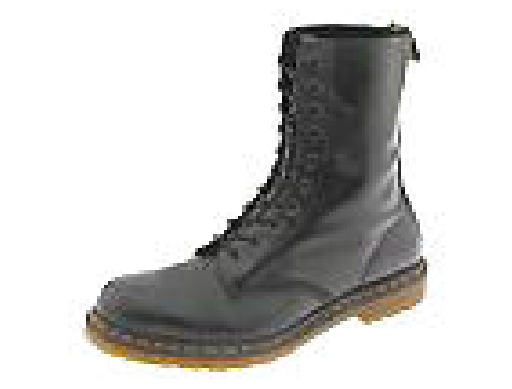

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

# Escogiendo y mostrando una imagen al azar del conjunto de test
idx = np.random.randint(1, 50)  # Ajusta el rango si es necesario
image_path = f'/content/shoe-vs-sandal-vs-boot-dataset/train/Boot/boot ({idx}).jpg'

# Verifica si el archivo existe
if os.path.exists(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a RGB para matplotlib
    plt.imshow(img)
    plt.axis('off')  # Ocultar ejes
    plt.show()
else:
    print("La imagen no existe en la ruta especificada:", image_path)

##1.4 Dividir

In [ ]:
import tensorflow as tf
import numpy as np

# Cargar las imágenes desde las carpetas en datasets de TensorFlow
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode='int',
    batch_size=8,
    image_size=(64, 64),
    shuffle=True  # Mezclamos las imágenes
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='int',
    batch_size=4,
    image_size=(64, 64),
    shuffle=False  # No es necesario barajar en el conjunto de test
)

def dataset_to_numpy(dataset):
    """Convierte un dataset de TensorFlow a arrays de NumPy."""
    images = []
    labels = []
    for img_batch, lbl_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(lbl_batch.numpy())

    # Concatenar solo al final para mejorar eficiencia
    return np.concatenate(images), np.concatenate(labels)

# Convertir el dataset de entrenamiento a NumPy arrays
x_train, y_train = dataset_to_numpy(train_dataset)
x_test, y_test = dataset_to_numpy(test_dataset)

# Verificar las dimensiones
print("Shape de x_train:", x_train.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de x_test:", x_test.shape)
print("Shape de y_test:", y_test.shape)


Found 12000 files belonging to 3 classes.
Found 3000 files belonging to 3 classes.
Shape de x_train: (12000, 64, 64, 3)
Shape de y_train: (12000,)
Shape de x_test: (3000, 64, 64, 3)
Shape de y_test: (3000,)


# 2.0 Red Neuronal

## 2.1 Preparación


In [ ]:
# Pre-procesado obligatorio cuando trabajo con redes neuronales
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_te = x_train / 255.0, x_test / 255.0 #Cambio al rango 0-1 -> Disminuyo CC
#One-hot encoding para minimizar error
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
print(y_train.shape)

y_te = to_categorical(y_test, num_classes=3)

x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42) # 3 subconjuntos es de vital importancia
print(y_tr.shape)
# print(y_tr[0])

(12000, 3)
(10800, 3)


In [ ]:
print(y_te.shape)

(3000, 3)


##2.2 Modelado

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout

#Topología
model = Sequential()
#Incrementar el tamaño de la imagen
model.add(Input(shape=(64, 64)))  # Usar Input como la primera capa
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
#Traigamos nuestro optimizador
from tensorflow.keras.optimizers import SGD
# define cómo se ajustará el modelo durante el entrenamiento para minimizar los errores de clasificación.
model.compile(loss="categorical_crossentropy", optimizer=SGD(0.005), metrics=["accuracy"])

In [ ]:
from tensorflow.keras.models import Model

input_layer = Input(shape=(64, 64, 3))
x = Flatten()(input_layer)
x = Dense(512, activation="relu")(x)
x= Dropout(0.5)(x)
output_layer = Dense(3, activation="softmax")(x)

model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
print(model.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       6,291,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,293,507 (24.01 MB)

 Trainable params: 6,293,507 (24.01 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=SGD(0.005), metrics=["accuracy"])

##2.3 Entrenamiento Simple

Empeora con batchsize menores a 16. Tal vez probar 32 o 128.
Epoch en 100 pueden probar si la RAM se los permite

In [ ]:
# Por fin podemos entrenar nuestra primera red neuronal
print("[INFO]: Entrenando red neuronal...")
H = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=50, batch_size=64)

[INFO]: Entrenando red neuronal...
Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5929 - loss: 1.3014 - val_accuracy: 0.7825 - val_loss: 0.5098
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7802 - loss: 0.5284 - val_accuracy: 0.8117 - val_loss: 0.4465
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8168 - loss: 0.4703 - val_accuracy: 0.7900 - val_loss: 0.4708
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8245 - loss: 0.4333 - val_accuracy: 0.8358 - val_loss: 0.4111
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8368 - loss: 0.4121 - val_accuracy: 0.8525 - val_loss: 0.3719
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8439 - loss: 0.3931 - val_accuracy: 0.8483 - val_loss: 0.3808
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8623 - loss: 0.3593 - val_accuracy: 0.8575 - val_loss: 0.3480
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8

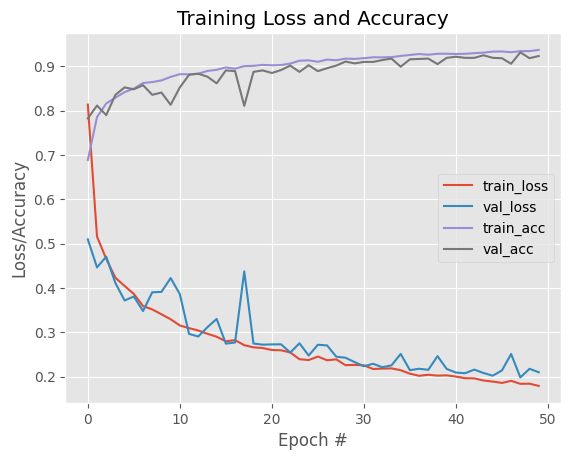

In [ ]:
# Muestro gráfica de accuracy y losses
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Matriz de confusión

###2.3.1 Evaluación

In [ ]:
from sklearn.metrics import classification_report
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_te, batch_size=128)
print(y_te[0])
print(predictions[0])
print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1)))


[INFO]: Evaluando red neuronal...
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
[1. 0. 0.]
[0.99463683 0.00376813 0.00159497]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1000
           1       0.98      0.86      0.92      1000
           2       0.89      0.96      0.93      1000

    accuracy                           0.93      3000
   macro avg       0.94      0.93      0.93      3000
weighted avg       0.94      0.93      0.93      3000



In [ ]:
print(model.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       6,291,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,293,509 (24.01 MB)

 Trainable params: 6,293,507 (24.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


#3.0 CNN Augmentation

##3.1 Preparación

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    """
    Creates the training and validation data generators for a multi-class dataset

    Args:
        TRAINING_DIR (string): directory path containing the training images
        VALIDATION_DIR (string): directory path containing the validation images

    Returns:
        train_generator, validation_generator - tuple containing the generators
    """

    # Generador para las imágenes de entrenamiento
    train_datagen = ImageDataGenerator(rescale=1.0/255.0)

    train_generator = train_datagen.flow_from_directory(
        directory=TRAINING_DIR,
        batch_size=20,
        class_mode='categorical',  # Cambiado a 'categorical' para 3 clases
        target_size=(150, 150)
    )

    # Generador para las imágenes de validación
    validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

    validation_generator = validation_datagen.flow_from_directory(
        directory=VALIDATION_DIR,
        batch_size=20,
        class_mode='categorical',  # Cambiado a 'categorical' para 3 clases
        target_size=(150, 150)
    )

    return train_generator, validation_generator


##3.2 Modelado

In [ ]:
# ipython-input-46-0b58d1cd8478
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf


# GRADED FUNCTION: create_model
def create_model():
    # Define un modelo de Keras para clasificar entre zapato, sandalia y bota
    # Usa al menos 3 capas convolucionales
    model = tf.keras.models.Sequential([
        # Primera capa convolucional con tamaño de entrada 150x150 y 3 canales de color
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        # Corrected typo: MaxPoolinag2D to MaxPooling2D
        tf.keras.layers.MaxPooling2D(2,2),
        # Aplana los resultados para conectarlos con una red densa
        tf.keras.layers.Flatten(),
        # Capa densa con 512 neuronas
        tf.keras.layers.Dense(512, activation='relu'),
        # Capa de salida con 3 neuronas, una para cada clase (zapato, sandalia y bota)
        tf.keras.layers.Dense(3, activation='softmax')  # Cambiado a 3 clases con activación softmax
    ])

    # Compila el modelo usando una pérdida para clasificación multiclase
    model.compile(optimizer=RMSprop(learning_rate=0.001),
                  # Changed loss function to 'categorical_crossentropy' to match one-hot encoded labels
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
TRAINING_DIR = '/content/shoe-vs-sandal-vs-boot-dataset/train'
VALIDATION_DIR = '/content/shoe-vs-sandal-vs-boot-dataset/test'

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


##3.3 Entrenamiento

In [ ]:
import tensorflow as tf

model = create_model()
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.7996 - loss: 0.5503 - val_accuracy: 0.9607 - val_loss: 0.1270
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.9628 - loss: 0.1156 - val_accuracy: 0.9717 - val_loss: 0.0877
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9795 - loss: 0.0573 - val_accuracy: 0.9657 - val_loss: 0.0955
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9902 - loss: 0.0286 - val_accuracy: 0.9750 - val_loss: 0.1201
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9941 - loss: 0.0187 - val_accuracy: 0.9760 - val_loss: 0.1626
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.9939 - loss: 0.0171 - val_accuracy: 0.9783 - val_loss: 0.1091
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9973 - loss: 0.0081 - val_accuracy: 0.9690 - val_loss: 0.2031
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9974 - loss: 0.0101 - val_accurac

###3.3.1 Evaluación

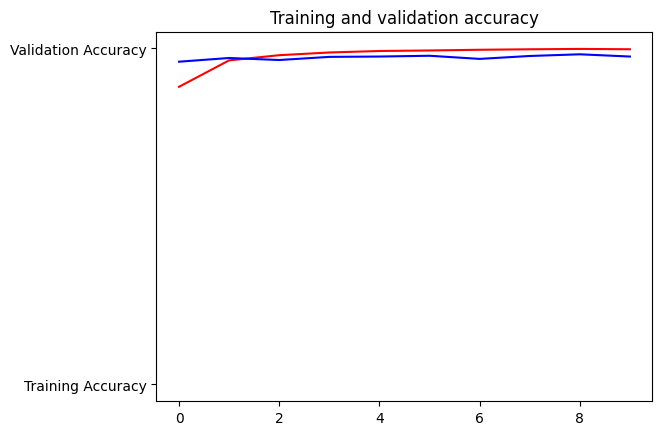

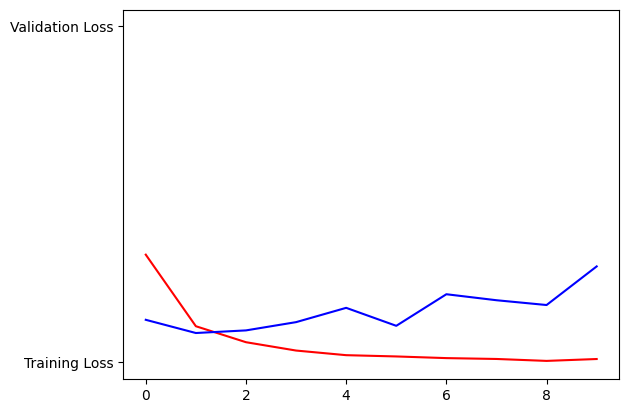

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

#4.0 CNN Fine Tunning + Augmentation

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15, # grados de rotacion aleatoria
    width_shift_range=0.2, # fraccion del total (1) para mover la imagen
    height_shift_range=0.2, # fraccion del total (1) para mover la imagen
    horizontal_flip=True, # girar las imagenes horizontalmente (eje vertical)
    zoom_range=0.2, # rango de zoom
    validation_split=0.2,
)



##4.1 Preparación

In [ ]:
# Imports que vamos a necesitar
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications import VGG16, imagenet_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout, Flatten, GlobalMaxPooling2D, Dense
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
from sklearn.preprocessing import LabelBinarizer

trainX = x_train
trainY = y_train
testX = x_test
testY = y_test
# Normalizamos las entradas
trainX = imagenet_utils.preprocess_input(trainX)
testX = imagenet_utils.preprocess_input(testX)

# Definimos dimensiones de nuestros datos de entrada y lista con las categorias de las clases
#Que la red defina el tamaño
input_shape = (64, 64, 3)
labelNames = ["boot", "sandal", "shoe"]

# En caso de inestabilidades numéricas pasar datos a one-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)




##4.2 Modelado

Detener el entrenamiento cuando ya no tenga un aprendizaje importante o cuando haya un sobre ajuste para evitar consumo de GPU

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization

#Probar con modelo distinto de VGG16 (más potente)

# Importamos VGG16 con pesos de imagenet y sin top_model especificando tamaño de entrada de datos
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
# Mostramos la arquitectura
print(base_model.summary())

# Congelamos las capas de los 4 primeros bloques convolucionales, el quinto se re-entrena
# En base_model.layers.name tenemos la información del nombre de la capa
for layer in base_model.layers:
  if layer.name == 'block5_conv3':
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada...')

# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output #(X)
x = Flatten()(last) #(X)
x = BatchNormalization()(x)
#Suele mejorar con 200 capas
x = Dense(500, activation='relu', name='fc1')(x) #(X)
x = Dropout(0.5)(x) #(X)
x = BatchNormalization()(x)
#Mejora con 100 capas
x = Dense(150, activation='relu', name='fc2')(x) #(X)
x = Dense(3, activation='softmax', name='predictions')(x) #(X)
model = Model(base_model.input, x) #(X)

# Compilamos el modelo
optimizer=Adam(learning_rate=0.00001) #En caso de que Adam no converga, probar SGD con momentum
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Vamos a visualizar el modelo prestando especial atención en el número de pesos total y el número de pesos entrenables.
# ¿tiene sentido en comparación al ejemplo de transfer learning?
print(model.summary())


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

None
Capa input_layer_15 congelada...
Capa block1_conv1 congelada...
Capa block1_conv2 congelada...
Capa block1_pool congelada...
Capa block2_conv1 congelada...
Capa block2_conv2 congelada...
Capa block2_pool congelada...
Capa block3_conv1 congelada...
Capa block3_conv2 congelada...
Capa block3_conv3 congelada...
Capa block3_pool congelada...
Capa block4_conv1 congelada...
Capa block4_conv2 congelada...
Capa block4_conv3 congelada...
Capa block4_pool congelada...
Capa block5_conv1 congelada...
Capa block5_conv2 congelada...


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │              

 Total params: 15,824,983 (60.37 MB)

 Trainable params: 3,465,007 (13.22 MB)

 Non-trainable params: 12,359,976 (47.15 MB)

None


##4.3 Entrenamiento

Desde aquí no he podido avanzar.
Ejecutar con esos hiperparámetros a ver el resultado en la evaluación.
Con eso podremos guiarnos para cambiar otros hiperparámetros.

In [ ]:

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H = model.fit(datagen.flow(trainX, trainY, batch_size=32, subset="training"), validation_data=datagen.flow(trainX, trainY, batch_size=32, subset="validation"),  epochs=50, verbose=1, callbacks=[early_stopping, reduce_lr])


[INFO]: Entrenando la red...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.3372 - loss: 1.3506 - val_accuracy: 0.3492 - val_loss: 31.6038 - learning_rate: 1.0000e-05
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 37s 61ms/step - accuracy: 0.4780 - loss: 1.0885 - val_accuracy: 0.3225 - val_loss: 13.8017 - learning_rate: 1.0000e-05
Epoch 3/50
123/300 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.4925 - loss: 1.0330

###4.3.1 Evaluación

In [ ]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
predictions = model.predict(testX, batch_size=64)
# Obtener el report de clasificación
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))


[INFO]: Evaluando el modelo...
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step
              precision    recall  f1-score   support

        boot       0.00      0.00      0.00      1000
      sandal       0.38      0.10      0.16      1000
        shoe       0.34      0.93      0.50      1000

    accuracy                           0.34      3000
   macro avg       0.24      0.34      0.22      3000
weighted avg       0.24      0.34      0.22      3000



ValueError: x and y must have same first dimension, but have shapes (50,) and (14,)

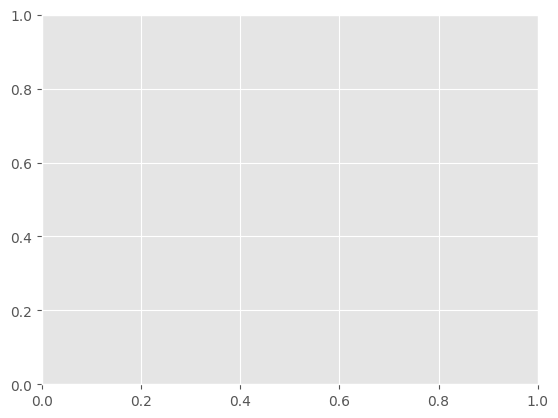

In [ ]:
# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()